In [16]:
import numpy as np
from pathlib import Path
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Define the source and target directories
source_dir = Path("assets/cards")
target_dir = Path("target/recolor")

# Create target directory if it doesn't exist
target_dir.mkdir(parents=True, exist_ok=True)

In [32]:

# Define the function to recolor the red parts to black and white
def recolor_image(image_path):
    image = Image.open(image_path).convert("RGBA")
    data = np.array(image)

    # Define the red color threshold
    red_threshold = (1, 255, 255)

    # Find all pixels that are red
    red_pixels = (data[:, :, 0] > red_threshold[0]) & (data[:, :, 1] < red_threshold[1]) & (data[:, :, 2] < red_threshold[2])

    # Desaturate the red pixels
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if red_pixels[i, j]:
                r, g, b, a = data[i, j]
                # Calculate the grayscale value
                gray = int(0.299 * r + 0.587 * g + 0.114 * b)
                data[i, j] = [gray, gray, gray, a]


    # Convert the data back to an image
    recolored_image = Image.fromarray(data)

    # Enhance the contrast to make the image darker
    enhancer = ImageEnhance.Contrast(recolored_image)
    recolored_image = enhancer.enhance(2)

    # Diagnostics
    red_pixel_count = np.sum(red_pixels)
    print(f"Changed {red_pixel_count} red pixels to black in {image_path.name}")

    assert red_pixel_count > 100, "Less than 100 pixels changed color, something might be wrong!"

    return recolored_image

In [33]:
# Recolor and save the images
recolor_count = 0
for card_path in source_dir.glob("*_white.png"):
    if "Clubs" in card_path.name or "Spades" in card_path.name:
        try:
            recolored_image = recolor_image(card_path)
            recolored_image.save(target_dir / card_path.name)
            recolor_count += 1
        except AssertionError as e:
            print(e)

print(f"Recoloring complete for {recolor_count} images.")

Changed 71766 red pixels to black in Clubs_10_white.png
Changed 66182 red pixels to black in Clubs_2_white.png
Changed 66499 red pixels to black in Clubs_3_white.png
Changed 66292 red pixels to black in Clubs_4_white.png
Changed 66818 red pixels to black in Clubs_5_white.png
Changed 67190 red pixels to black in Clubs_6_white.png
Changed 65321 red pixels to black in Clubs_7_white.png
Changed 67936 red pixels to black in Clubs_8_white.png
Changed 67158 red pixels to black in Clubs_9_white.png
Changed 67168 red pixels to black in Clubs_A_white.png
Changed 65837 red pixels to black in Clubs_Jack_white.png
Changed 80182 red pixels to black in Clubs_King_white.png
Changed 76150 red pixels to black in Clubs_Queen_white.png
Changed 66126 red pixels to black in Spades_10_white.png
Changed 60541 red pixels to black in Spades_2_white.png
Changed 60858 red pixels to black in Spades_3_white.png
Changed 60651 red pixels to black in Spades_4_white.png
Changed 61176 red pixels to black in Spades_5_whi

Original Images:


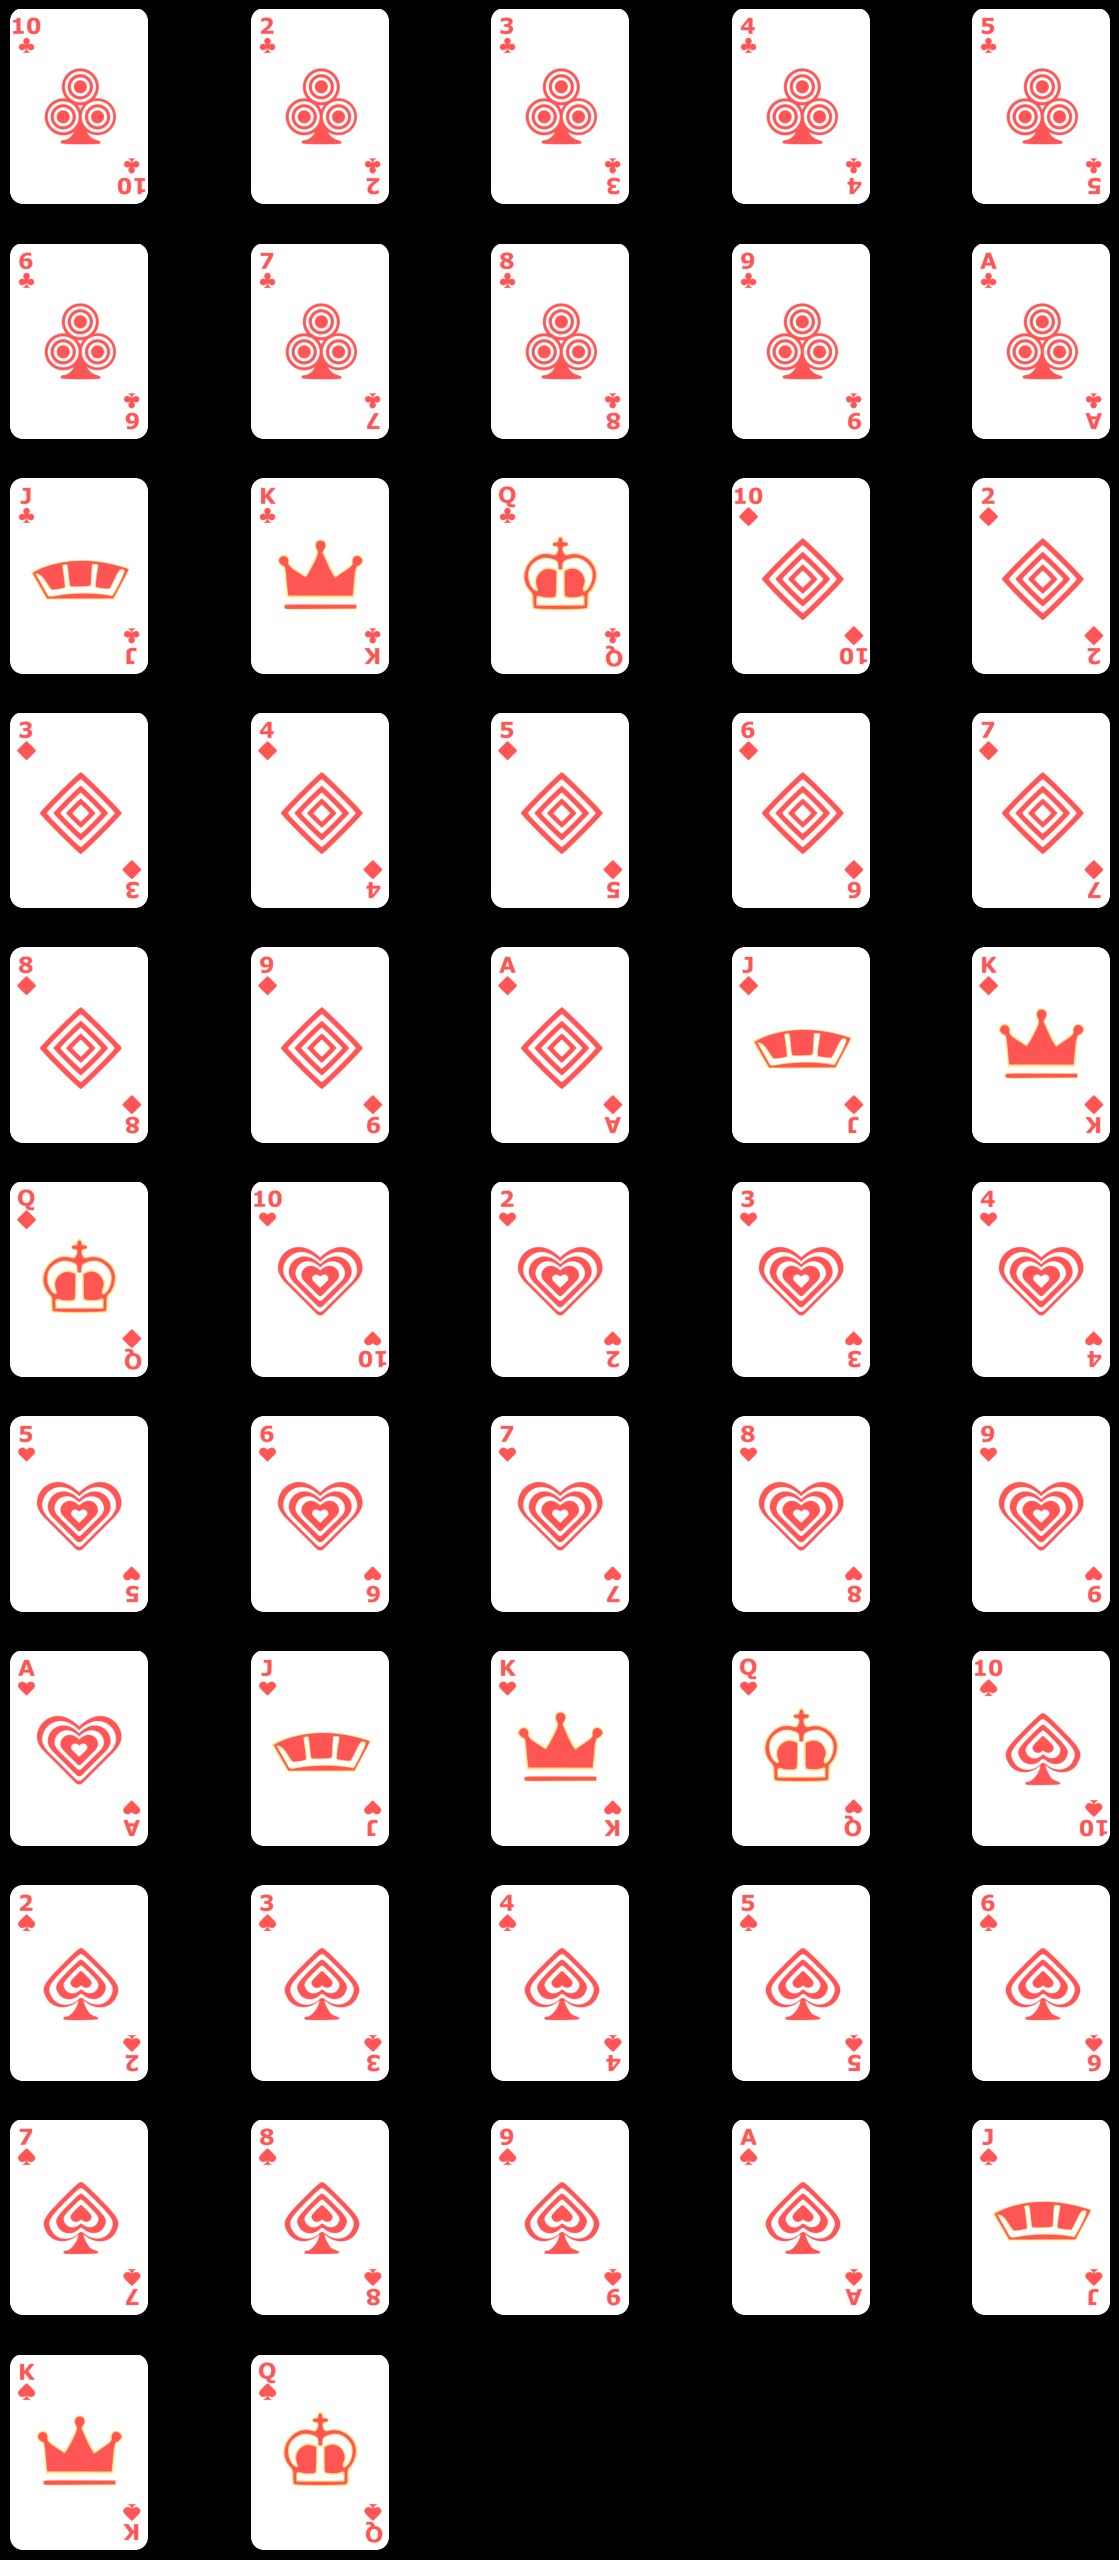

Recolored Images:


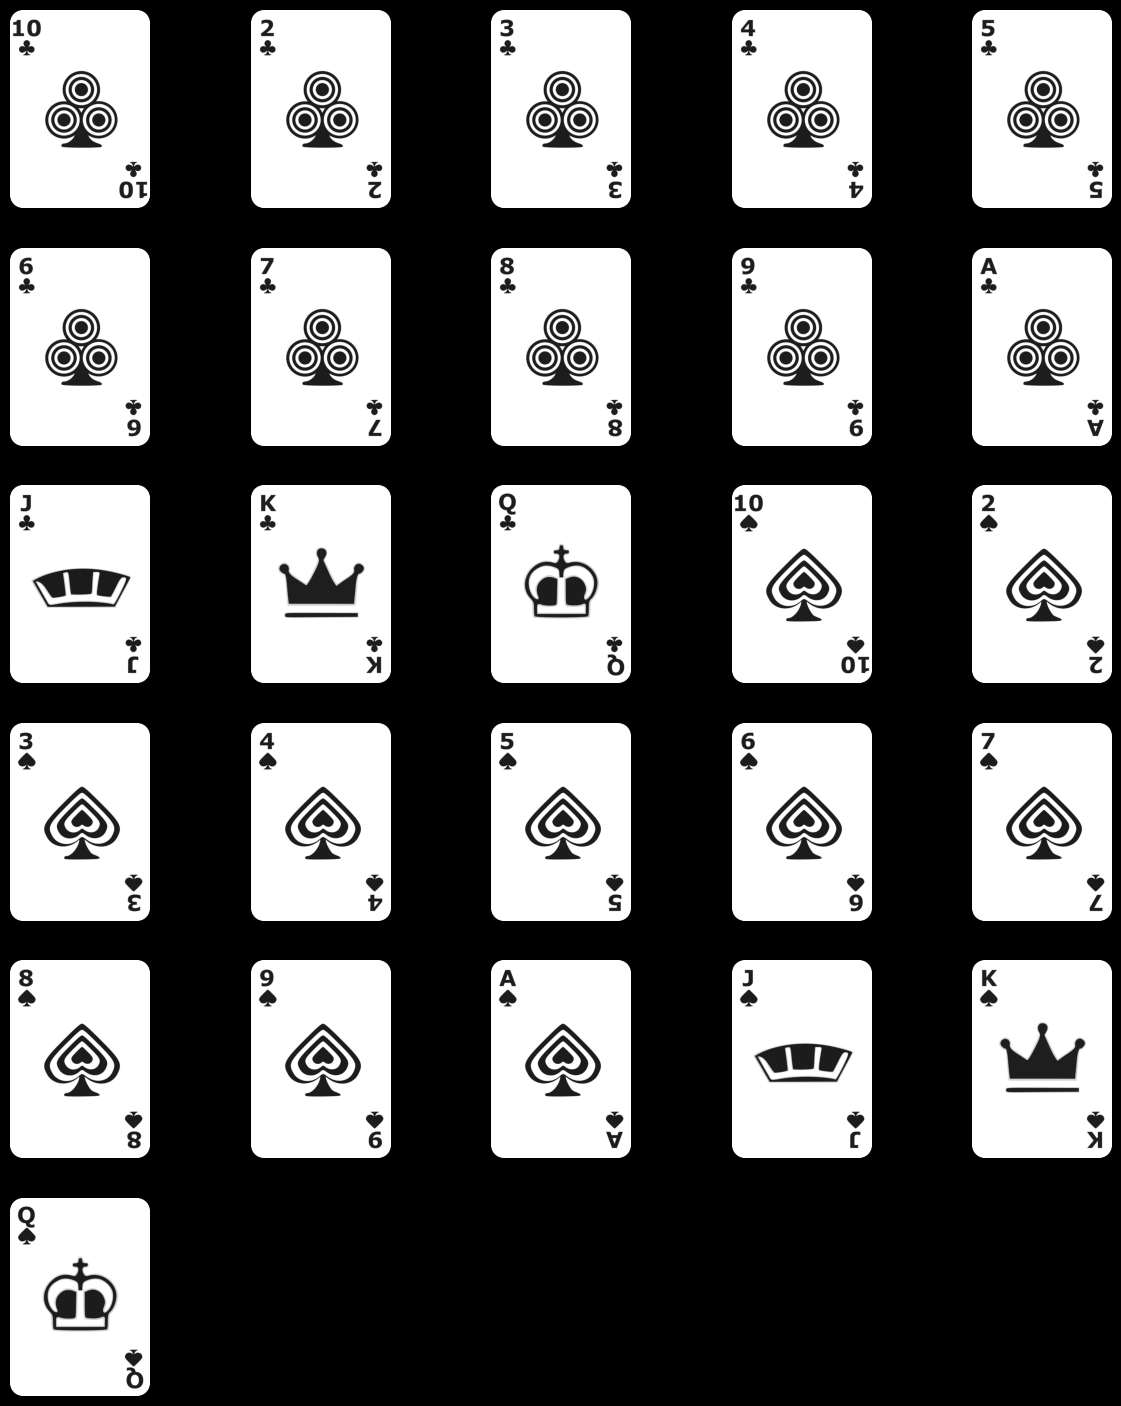

In [34]:

# Preview of a grid of the cards
def preview_images(image_paths, cols=5):
    images = [Image.open(path) for path in image_paths]
    rows = len(images) // cols + int(len(images) % cols != 0)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
            ax.axis('off')
        else:
            ax.remove()
    plt.show()

# Preview the original and recolored images
original_paths = list(source_dir.glob("*_white.png"))
recolored_paths = list(target_dir.glob("*_white.png"))

print("Original Images:")
preview_images(original_paths)

print("Recolored Images:")
preview_images(recolored_paths)